<a href="https://colab.research.google.com/github/Devanshu0502/Airways-Customer-Data/blob/main/Sentiment_Analysis_for_air_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Array
import numpy as np

# DataFrame
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Data reading
air_c=pd.read_csv('/content/drive/MyDrive/Projects/Airways data/airline_data.csv')

# Data Copy
air=air_c.copy()

# Data
air.head()

,Unnamed: 0,reviews,rates,date,country
0,0,✅ Trip Verified | Excellent service both on th...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,24th January 2023,United Kingdom
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,24th January 2023,United Kingdom
2,2,✅ Trip Verified | A really excellent journey....,9,23rd January 2023,United Kingdom
3,3,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom
4,4,Not Verified | It seems that there is a race t...,2,19th January 2023,United States


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3418 non-null   int64 
 1   reviews     3418 non-null   object
 2   rates       3418 non-null   object
 3   date        3418 non-null   object
 4   country     3416 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.6+ KB


In [5]:
air.drop('Unnamed: 0',axis=1,inplace=True)
air.head()

,reviews,rates,date,country
0,✅ Trip Verified | Excellent service both on th...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,24th January 2023,United Kingdom
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,24th January 2023,United Kingdom
2,✅ Trip Verified | A really excellent journey....,9,23rd January 2023,United Kingdom
3,✅ Trip Verified | This flight was one of the ...,9,21st January 2023,United Kingdom
4,Not Verified | It seems that there is a race t...,2,19th January 2023,United States


In [6]:
# Changing datatypes
for i in list(air.columns):
    air[i]=air[i].astype('category')
air['date']=pd.to_datetime(air['date'],errors='coerce')
air['rates']=pd.to_numeric(air['rates'],errors='coerce')
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   reviews  3418 non-null   category      
 1   rates    3413 non-null   float64       
 2   date     3418 non-null   datetime64[ns]
 3   country  3416 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 221.8 KB


In [7]:
# Checking user is verified or not
air['verified']=air['reviews'].str.contains("Trip Verified")
air.head()

,reviews,rates,date,country,verified
0,✅ Trip Verified | Excellent service both on th...,5.0,2023-01-24,United Kingdom,True
1,✅ Trip Verified | Good lounge at Cape Town. O...,9.0,2023-01-24,United Kingdom,True
2,✅ Trip Verified | A really excellent journey....,9.0,2023-01-23,United Kingdom,True
3,✅ Trip Verified | This flight was one of the ...,9.0,2023-01-21,United Kingdom,True
4,Not Verified | It seems that there is a race t...,2.0,2023-01-19,United States,False


In [8]:
air.describe().T

,count,mean,std,min,25%,50%,75%,max
rates,3413.0,4.813947,3.144845,1.0,2.0,4.0,8.0,10.0


## Review Cleaning(NLP Opeartions)

In [11]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                        #for replacing non-word characters
    text = re.sub('\s+',' ', text)                                        #for replacng extra spaces
    text = re.sub("(?<!\w)\d+", "", text)                                 # Remove all numbers except those attached to a word
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                           # Remove all hyphens except between two words
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]      #for removing punctuation in the strings
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])   #for removing stop words
    
    
    return nopunc

# Defining a function for lemitization

def lemmatize(words):
    words=nlp(words)
    lemmas = []
    for word in words:
        lemmas.append(word.lemma_)
    return lemmas

#converting them into string
def listtostring(s):
    str1=' '
    return (str1.join(s))

def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)#Regular Expression
import re

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Creating a new feature for cleaned reviews
air['Clean']=air['reviews'].str.strip("✅ Trip Verified |").apply(clean_text)
air.head()

,reviews,rates,date,country,verified,Clean
0,✅ Trip Verified | Excellent service both on th...,5.0,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,✅ Trip Verified | Good lounge at Cape Town. O...,9.0,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,✅ Trip Verified | A really excellent journey....,9.0,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,✅ Trip Verified | This flight was one of the ...,9.0,2023-01-21,United Kingdom,True,flight one bad ever life want pamper buy busin...
4,Not Verified | It seems that there is a race t...,2.0,2023-01-19,United States,False,verify seem race bottom amongst airline can no...


In [13]:
for i in range(len(air)):
    air['Clean'][i]=re.sub('verify','',air['Clean'][i])
air.head()

,reviews,rates,date,country,verified,Clean
0,✅ Trip Verified | Excellent service both on th...,5.0,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,✅ Trip Verified | Good lounge at Cape Town. O...,9.0,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,✅ Trip Verified | A really excellent journey....,9.0,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,✅ Trip Verified | This flight was one of the ...,9.0,2023-01-21,United Kingdom,True,flight one bad ever life want pamper buy busin...
4,Not Verified | It seems that there is a race t...,2.0,2023-01-19,United States,False,seem race bottom amongst airline can not even...


# Sentimental Analysis

In [14]:
from textblob import TextBlob

# Function to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# Function to generate Sentiments
def analysis(score):
    if score <= 0:
        return 'Negative'
    else:
        return 'Positive'

In [15]:
# Creating feature for polarity
air['polarity']=air['Clean'].apply(getpolarity)
# Creating feature for Sentiment
air['sentiment']=air['polarity'].apply(analysis)
air.head()

,reviews,rates,date,country,verified,Clean,polarity,sentiment
0,✅ Trip Verified | Excellent service both on th...,5.0,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,0.311905,Positive
1,✅ Trip Verified | Good lounge at Cape Town. O...,9.0,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,0.260000,Positive
2,✅ Trip Verified | A really excellent journey....,9.0,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,0.245059,Positive
3,✅ Trip Verified | This flight was one of the ...,9.0,2023-01-21,United Kingdom,True,flight one bad ever life want pamper buy busin...,-0.031331,Negative
4,Not Verified | It seems that there is a race t...,2.0,2023-01-19,United States,False,seem race bottom amongst airline can not even...,-0.078125,Negative


# EDA

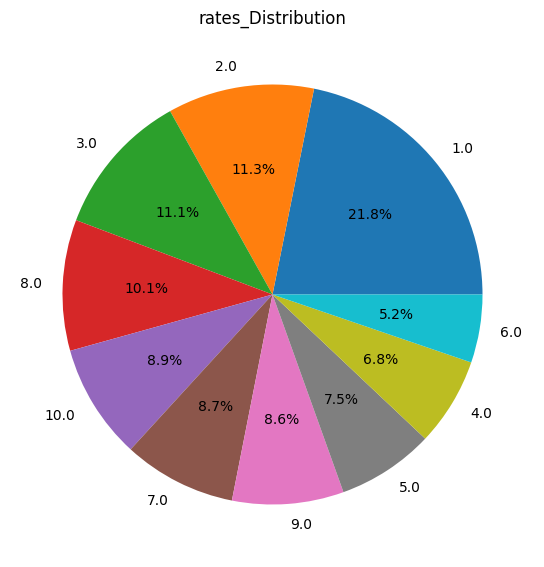

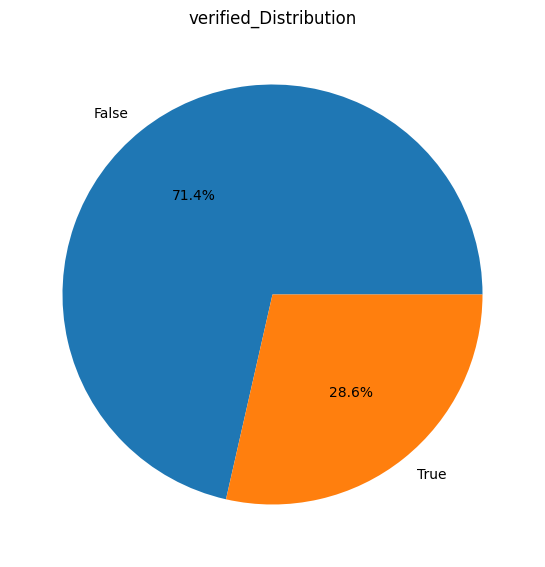

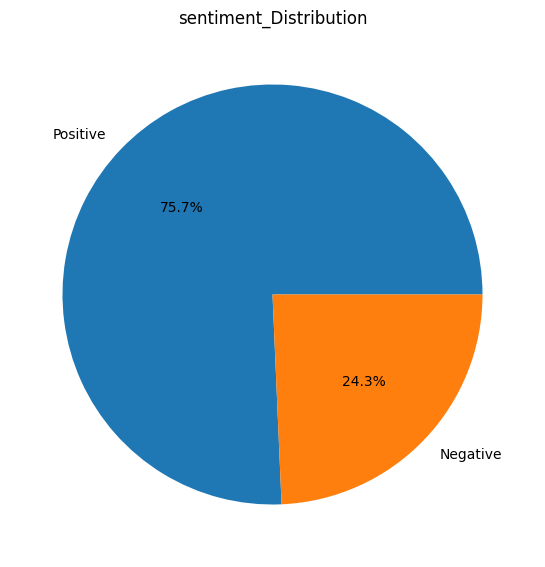

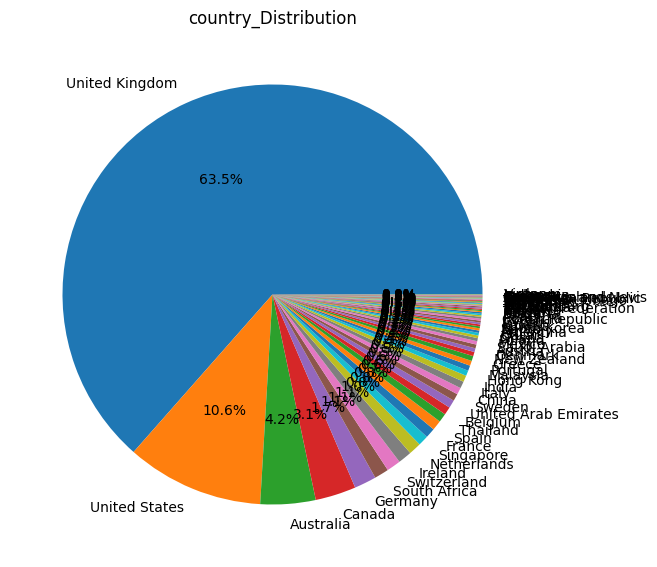

In [16]:
lst=['rates','verified','sentiment','country']

for i in range(len(lst)):
    plt.figure(figsize=(20,15))
    plt.subplot(2,2,i+1)
    a= air[lst[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct='%.1f%%')
    plt.title(lst[i]+"_Distribution")
    plt.show()

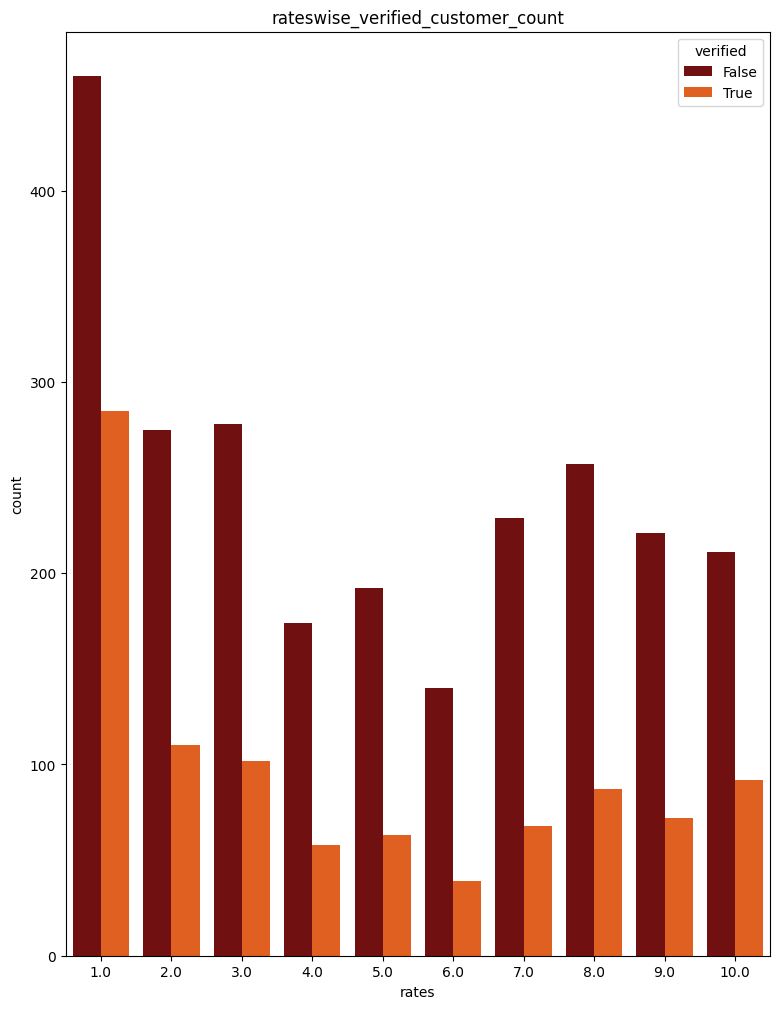

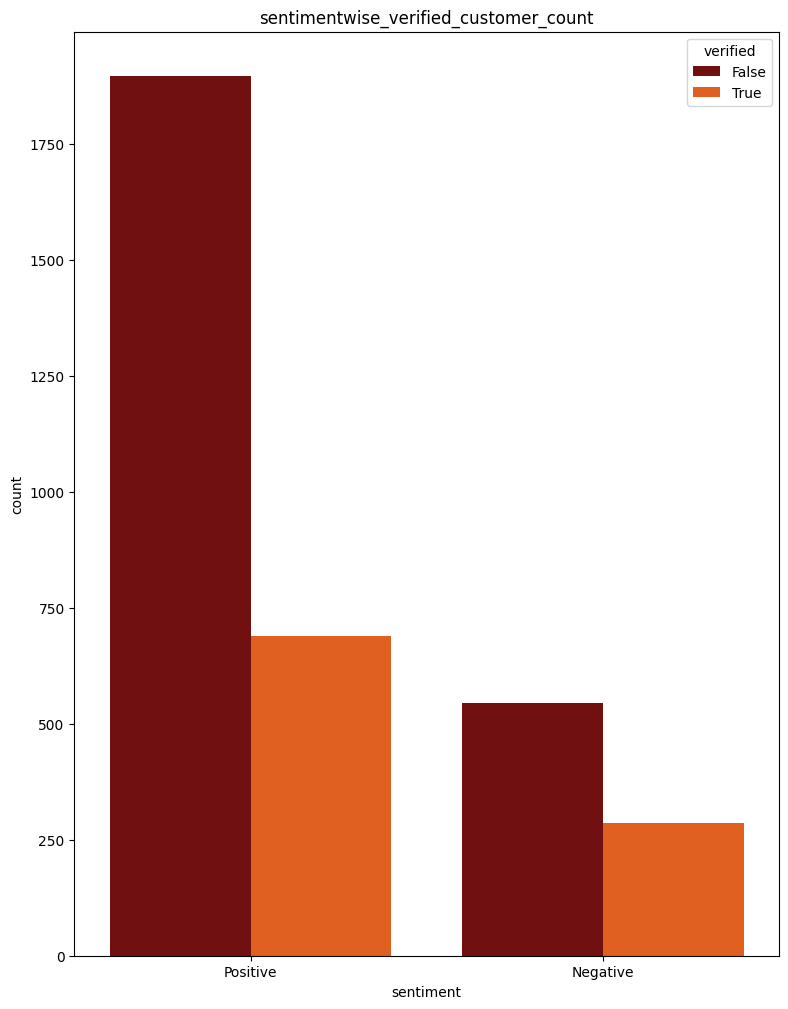

In [17]:
# Rate & sentiment vs Verified Distribution
lst=['rates','sentiment']
for i in range(len(lst)):
    plt.figure(figsize=(20,12))
    plt.subplot(1,2,i+1)
    sns.countplot(data=air,x=lst[i],hue='verified',palette='gist_heat')
    plt.xlabel(lst[i])
    plt.title(lst[i]+'wise_verified_customer_count')
plt.show()

# Machine Learning Models

In [18]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [19]:
# Train Test spliting of features
x=air['Clean']
y=air['sentiment']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = LogisticRegression()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with MultinomialNB
    
    lr = MultinomialNB()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Decision Tree Classifier
    
    lr = DecisionTreeClassifier(random_state=1)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with knn
    
    lr = KNeighborsClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Random Forest
    
    lr = RandomForestClassifier(random_state=10)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Adaptive Boosting
    
    lr = AdaBoostClassifier(random_state=1)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [21]:
# Evaluating Models

print('******************************************************************Logistic Regression***************************************************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('******************************************************************Multinomial NB********************************************************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('******************************************************************Decision Tree*********************************************************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('*******************************************************************K Nearest Neighbor***************************************************')
print('\n')
model_knn_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('*******************************************************************Random Forest Bagging************************************************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('*******************************************************************Adaptive Boosting****************************************************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

******************************************************************Logistic Regression***************************************************


Time : 0.10337567329406738
Accuracy:  0.8099415204678363
Confusion Matrix: 
 [[ 58 191]
 [  4 773]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.94      0.23      0.37       249
    Positive       0.80      0.99      0.89       777

    accuracy                           0.81      1026
   macro avg       0.87      0.61      0.63      1026
weighted avg       0.83      0.81      0.76      1026





******************************************************************Multinomial NB********************************************************


Time :  0.0314326286315918
Accuracy:  0.7573099415204678
Confusion Matrix: 
 [[  0 249]
 [  0 777]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       249
    Positive       0.76      1.0

In [22]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Multinomial NB','Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,acc_knn_tf,acc_rf_tf,acc_ab_tf])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,f1_knn_tf,f1_rf_tf,f1_ab_tf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.809942,0.763009
Multinomial NB,0.757310,0.652723
Decision Tree,0.795322,0.792967
KNN,0.774854,0.735836
Random Forest,0.784600,0.715869
Adaptive Boosting,0.867446,0.864453


In [23]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
5,Adaptive Boosting,0.867446,0.864453
2,Decision Tree,0.795322,0.792967
0,Logistic Regreesion,0.809942,0.763009
3,KNN,0.774854,0.735836
4,Random Forest,0.784600,0.715869
1,Multinomial NB,0.757310,0.652723



 OneVsRestClassifier(estimator=LogisticRegression())
f1-Score(train): mean= (0.732), min=(0.712)) ,max= (0.751), stdev= (0.013)
f1-Score(test): 0.7326

 OneVsRestClassifier(estimator=MultinomialNB())
f1-Score(train): mean= (0.652), min=(0.651)) ,max= (0.653), stdev= (0.001)
f1-Score(test): 0.6519

 OneVsRestClassifier(estimator=DecisionTreeClassifier(random_state=1))
f1-Score(train): mean= (0.745), min=(0.726)) ,max= (0.770), stdev= (0.019)
f1-Score(test): 0.7455

 OneVsRestClassifier(estimator=KNeighborsClassifier())
f1-Score(train): mean= (0.716), min=(0.701)) ,max= (0.745), stdev= (0.015)
f1-Score(test): 0.7157

 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=10))
f1-Score(train): mean= (0.711), min=(0.690)) ,max= (0.731), stdev= (0.013)
f1-Score(test): 0.7112

 OneVsRestClassifier(estimator=AdaBoostClassifier(random_state=1))
f1-Score(train): mean= (0.842), min=(0.821)) ,max= (0.860), stdev= (0.015)
f1-Score(test): 0.8419


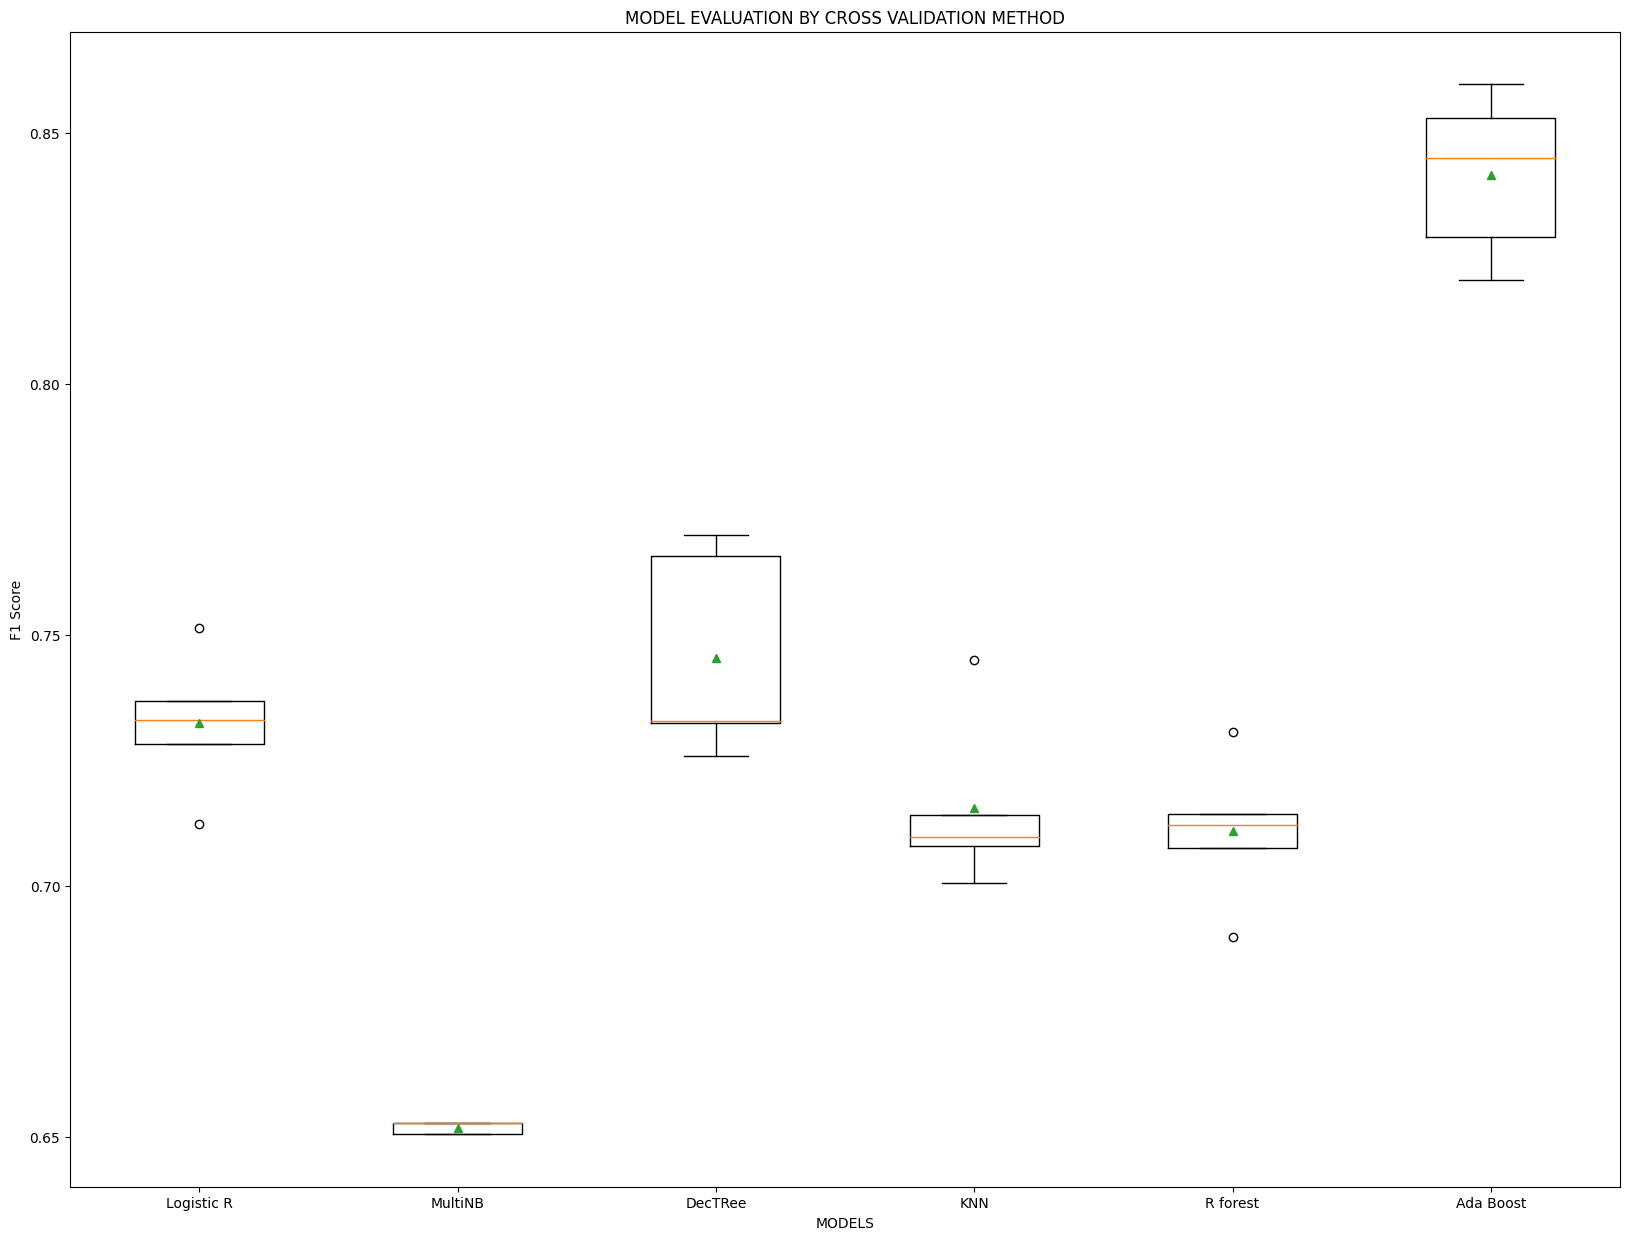

In [24]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)
###############################################################################
# Model building
lr =OneVsRestClassifier(LogisticRegression())
mnb=OneVsRestClassifier(MultinomialNB())
dct=OneVsRestClassifier(DecisionTreeClassifier(random_state=1))
knn=OneVsRestClassifier(KNeighborsClassifier())
rf=OneVsRestClassifier(RandomForestClassifier(random_state=10))
ab=OneVsRestClassifier(AdaBoostClassifier(random_state=1))
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train_v,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(20,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [25]:
# Grid Search Cv to find out the best parameter for model
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
# defining the classifier
model = AdaBoostClassifier(random_state=1)

# creating a dic for the grid
grid = dict()

# estimator till 500
grid['n_estimators'] = [10, 50, 100, 200, 500]

# defining learning rate
grid['learning_rate'] = [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]


# defining the CV
#cv = StratifiedKFold(n_splits=5)

# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1)


# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.856612 using {'learning_rate': 0.1, 'n_estimators': 500}


In [26]:
#Tuned Model for prediction
x=air['Clean']
y=air['sentiment']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

ab_tf_ovr= OneVsRestClassifier(AdaBoostClassifier(learning_rate= 0.1, n_estimators = 500,random_state=1))

ab_tf_ovr.fit(x_train,y_train)
y_pred=ab_tf_ovr.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_ab_tf=accuracy_score(y_test,y_pred)
f1_ab_tf=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_ab_tf)
print('F1 Score: ',f1_ab_tf)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.8752436647173489
F1 Score:  0.8677303420760517
Confusion Matrix: 
 [[150  99]
 [ 29 748]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.84      0.60      0.70       249
    Positive       0.88      0.96      0.92       777

    accuracy                           0.88      1026
   macro avg       0.86      0.78      0.81      1026
weighted avg       0.87      0.88      0.87      1026



# Sentiment Prediction On Random Data

In [27]:
# Prediction on random data
data=["""✅ Trip Verified |  I would like to thank you for the great service. 
I am a handicap and my family and I were afraid of this trip because I was flying alone and had a 
layover in London of a few hours. I had to change terminals and everything but thanks to a great 
service my trip was amazing. They took great care of me and made sure I was doing well throughout the whole flight."""]
data=vector.transform(data)
ab_tf_ovr.predict(data)

array(['Positive'], dtype='<U8')

In [28]:
# Prediction on random data
data=["""✅ Trip Verified |  Miami to London. The breakfast served just before landing was terrible. 
A terrible croissant with some cream cheese with onions and a breakfast fruit bar. It was wrapped in cellophane. Hardly anyone ate it what a waste."""]
data=vector.transform(data)
ab_tf_ovr.predict(data)

array(['Negative'], dtype='<U8')